# **Object Identification**

Object identification (or object recognition) is a general term to describe a collection of related computer vision tasks that involve identifying objects in images. It includes object detection: the location of objects with a bounding box and types or classes of the located objects in an image. Input of this task is an image with one or more objects.

In this notebook object identification is demonstrated with the ``yolo`` algorithm (version 3).

For more information please visit https://github.com/ultralytics/yolov3 

# Setup


In [3]:
# Clone repository ultralytics/yolov3 and install dependencies according to the modules in requirements.txt 

!git clone https://github.com/ultralytics/yolov3

%cd yolov3
%pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9795, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 9795 (delta 6), reused 12 (delta 6), pack-reused 9779
Receiving objects: 100% (9795/9795), 9.06 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (6662/6662), done.
/content/yolov3
     |████████████████████████████████| 645kB 6.4MB/s 


In [4]:
# Load modules and display the current setup

import torch
from IPython.display import Image, clear_output

clear_output()

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla P4)


# Inference

The module ``detect.py`` runs YOLOv3 inference on a variety of sources, downloading models automatically from the [latest YOLOv3 release](https://github.com/ultralytics/yolov3/releases), and saving results to `runs/detect`. Example inference sources are:

<img src="https://user-images.githubusercontent.com/26833433/114307955-5c7e4e80-9ae2-11eb-9f50-a90e39bee53f.png" width="900"> 

## Demonstrate YOLOv3 on a sample image

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.01, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-7-g26cb451 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

100% 118M/118M [00:03<00:00, 31.2MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.3 GFLOPS
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 9 persons, 1 bicycle, 2 buss, 1 stop sign, 4 handbags, 3 ties, 1 sports ball, 2 cell phones, Done. (0.150s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 10 persons, 7 ties, 1 cell phone, Done. (0.092s)
Results saved to runs/detect/exp
Done. (0.476s)


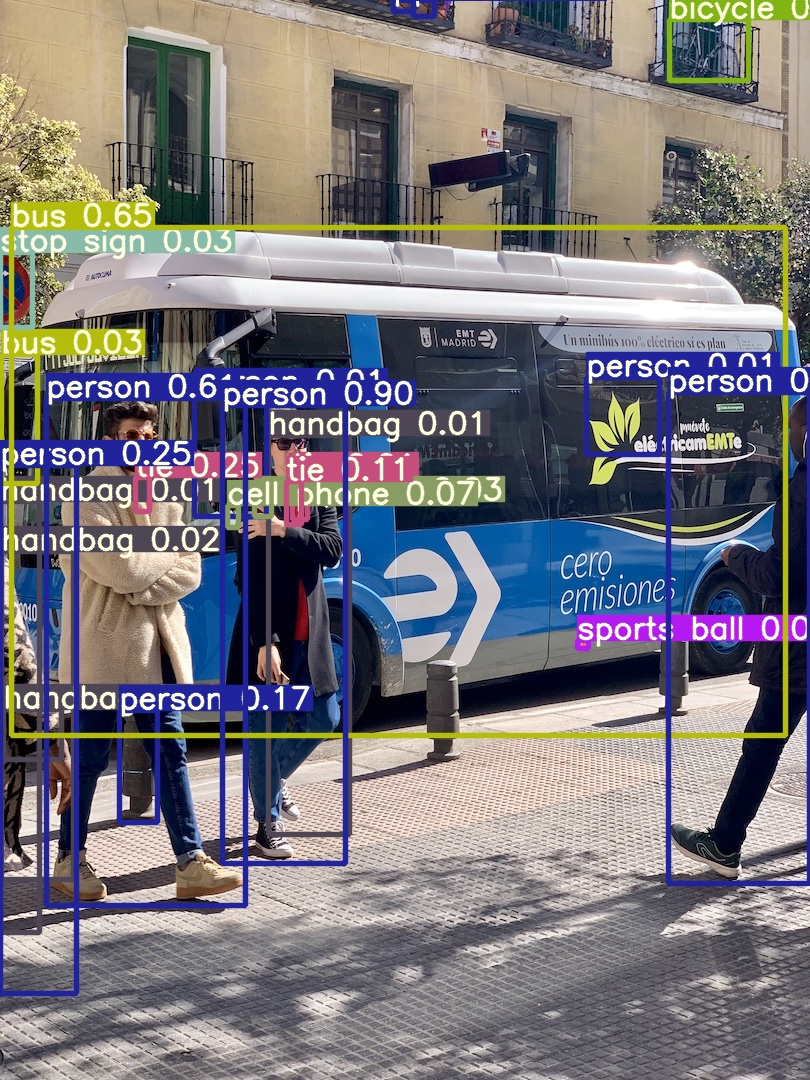

In [5]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.01 --source data/images/
Image(filename='runs/detect/exp/bus.jpg', width=600)

## Demonstrate YOLOv3 on a sample video


In the following it is shown, which detections the YOLOv3 algorithm can do an a sample video which shows people passing by in a busy street.

In [6]:
# Download sample video

video_path = '/content/yolov3/data/street_life.mp4'

!curl -o $video_path https://raw.githubusercontent.com/iubh/DLMAINLPCV01/master/data/cv_videos/Pexels%20Videos%202880.mp4

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7933k  100 7933k    0     0  11.7M      0 --:--:-- --:--:-- --:--:-- 11.7M


In [6]:
# Detect objects in the video and store output runs/detect

# Detection model
model = 'yolov3.pt' # or 'yolov3-spp.pt' or 'yolov3-tiny.pt'

# Inference image size
img_size = 640

# Object confidence threshold
conf_th = 0.25

!python detect.py --source $video_path  --weights $model --img $img_size --conf $conf_th


In [9]:
# Show the original video content
from IPython.display import HTML
from base64 import b64encode
import os

# Compressed video path
# compressed_path = '/content/yolov3/data/comp_street_life.mp4'

# Compress video
# os.system(f"ffmpeg -i {video_path} -c libx264 {compressed_path}")

# Open video as binary
mp4 = open(compressed_path, 'rb').read()

# Show video
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
 <video width=400 controls>
       <source src="%s" type="video/mp4">
 </video>
 """ % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Show inference video

# Input video path
save_path = '/content/yolov3/runs/detect/exp2/street_life.mp4'

# Compressed video path
compressed_path = '/content/yolov3/runs/detect/exp2/comp_street_life.mp4'

# Compress video
os.system(f"ffmpeg -i {save_path} -c libx264 {compressed_path}")


0

In [11]:
# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.